# Code Example of a Neural Network for The Function XOR

Based on the implementation by [Chih-Ling Hsu](https://chih-ling-hsu.github.io/2017/08/30/NN-XOR).

In [155]:
import numpy as np
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# The following code is used for hiding the warnings and make this notebook clearer.
#iport warnings
#warnings.filterwarnings('ignore')

In [13]:
def sig(x):
    return 1.0 / (1.0 + np.exp(-x))

def sig_derivative(x):
    return sig(x)*(1.0 - sig(x))

In [14]:
def tanh(x):
    return (1.0 - numpy.exp(-2*x))/(1.0 + numpy.exp(-2*x))

def tanh_derivative(x):
    return (1 + x)*(1 - x)

In [107]:
class NeuralNetwork:
    #########
    # parameters
    # ----------
    # self:      the class object itself
    # net_arch:  consists of a list of integers, indicating
    #            the number of neurons in each layer, i.e. the network architecture
    #########
    def __init__(self, 
                 net_arch,
                 act= 'tanh'):
        np.random.seed(0)
        
        if act == 'sig':
            self.activity = sig
            self.activity_derivative = sig_derivative
            
        if act == 'tanh':
            self.activity = tanh
            self.activity_derivative = tanh_derivative
            
        # Initialized the weights, making sure we also 
        # initialize the weights for the biases that we will add later
        #self.activity = tanh
        #self.activity_derivative = tanh_derivative
        self.layers = len(net_arch)
        self.steps_per_epoch = 1
        self.arch = net_arch
        self.weights = []

        # Random initialization with range of weight values (-1,1)
        for layer in range(self.layers - 1):
            w = 2*np.random.rand(net_arch[layer] + 1, net_arch[layer+1]) - 1
            self.weights.append(w)
    
    def _forward_prop(self, x):
        y = x

        for i in range(len(self.weights)-1):
            activation = np.dot(y[i], self.weights[i])
            activity = self.activity(activation)

            # add the bias for the next layer ### CHECK TOSE BIAS
            activity = np.concatenate((np.ones(1), np.array(activity)))
            y.append(activity)

        # last layer
        activation = np.dot(y[-1], self.weights[-1])
        activity = self.activity(activation)
        y.append(activity)
        
        return y
    
    def _back_prop(self, y, target, learning_rate):
        
        error = target - y[-1]
        delta_vec = [error * self.activity_derivative(y[-1])]

        # we need to begin from the back, from the next to last layer
        for i in range(self.layers-2, 0, -1):
            error = delta_vec[-1].dot(self.weights[i][1:].T)
            error = error*self.activity_derivative(y[i][1:])
            delta_vec.append(error)

        # Now we need to set the values from back to front
        delta_vec.reverse()
        
        # Finally, we adjust the weights, using the backpropagation rules
        for i in range(len(self.weights)):
            layer = y[i].reshape(1, self.arch[i]+1)
            delta = delta_vec[i].reshape(1, self.arch[i+1])
            self.weights[i] += learning_rate*layer.T.dot(delta)
    
    #########
    # parameters
    # ----------
    # self:    the class object itself
    # data:    the set of all possible pairs of booleans True or False indicated by the integers 1 or 0
    # labels:  the result of the logical operation 'xor' on each of those input pairs
    #########
    def fit(self, 
            data,
            labels,
            learning_rate= 0.1,
            epochs= 100,
            int_rep= False,
            int_rep_index= -2):
        
        # Add bias units to the input layer - 
        # add a "1" to the input data (the always-on bias neuron)
        ones = np.ones((1, data.shape[0]))
        Z = np.concatenate((ones.T, data), axis=1)
        
        int_rep_ = []
        int_rep_.append(data)
        
        for k in range(epochs):
            if (k+1) % 10000 == 0:
                print('epochs: {}'.format(k+1))
        
            sample = np.random.randint(X.shape[0])

            # We will now go ahead and set up our feed-forward propagation:
            x = [Z[sample]]
            y = self._forward_prop(x)

            # Now we do our back-propagation of the error to adjust the weights:
            target = labels[sample]
            self._back_prop(y, target, learning_rate)
            
            ###################################
            
            # Internal monitor
            if int_rep:
                lin_bias = np.dot(Z, self.weights[int_rep_index])
                act = self.activity(lin_bias)
                int_rep_.append(act)
                      
        if int_rep:
            return int_rep_
    
    #########
    # the predict function is used to check the prediction result of
    # this neural network.
    # 
    # parameters
    # ----------
    # self:   the class object itself
    # x:      single input data
    #########
    
    def predict_single_data(self, x):
        val = np.concatenate((np.ones(1).T, np.array(x)))
        for i in range(0, len(self.weights)):
            val = self.activity(np.dot(val, self.weights[i]))
            val = np.concatenate((np.ones(1).T, np.array(val)))
        return val[1]
    
    #########
    # the predict function is used to check the prediction result of
    # this neural network.
    # 
    # parameters
    # ----------
    # self:   the class object itself
    # X:      the input data array
    #########
    def predict(self, X):
        Y = np.array([]).reshape(0, self.arch[-1])
        for x in X:
            y = np.array([[self.predict_single_data(x)]])
            Y = np.vstack((Y,y))
        return Y

In [142]:
np.random.seed(0)

# Initialize the NeuralNetwork with
# 2 input neurons
# 2 hidden neurons
# 1 output neuron
nn = NeuralNetwork([2,2, 1],
                   act= 'tanh')

# Set the input data
X = np.array([[-1, -1], [-1, 1],
                [1, -1], [1, 1]])

# Set the labels, the correct results for the xor operation
y = np.array([-1, 1, 
                 1, -1])

# Call the fit function and train the network for a chosen number of epochs
int_rep= nn.fit(X, 
                y,
                epochs= 500,
                int_rep= True,
                int_rep_index= -2)

# Show the prediction results
print("Final prediction")
for s in X:
    print(s, nn.predict_single_data(s))

Final prediction
[-1 -1] -0.8655369434451715
[-1  1] 0.8941010888777879
[ 1 -1] 0.8926255735554095
[1 1] -0.867292378262944


In [143]:
l_minus_minus_x = []
l_minus_minus_y = []
l_minus_plus_x = []
l_minus_plus_y = []
l_plus_minus_x = []
l_plus_minus_y = []
l_plus_plus_x = []
l_plus_plus_y = []

for j in range(len(int_rep)):
    
    l_minus_minus_x.append(int_rep[j][0][0])
    l_minus_minus_y.append(int_rep[j][0][1])
    l_minus_plus_x.append(int_rep[j][1][0])
    l_minus_plus_y.append(int_rep[j][1][1])
    l_plus_minus_x.append(int_rep[j][2][0])
    l_plus_minus_y.append(int_rep[j][2][1])
    l_plus_plus_x.append(int_rep[j][3][0])
    l_plus_plus_y.append(int_rep[j][3][1])

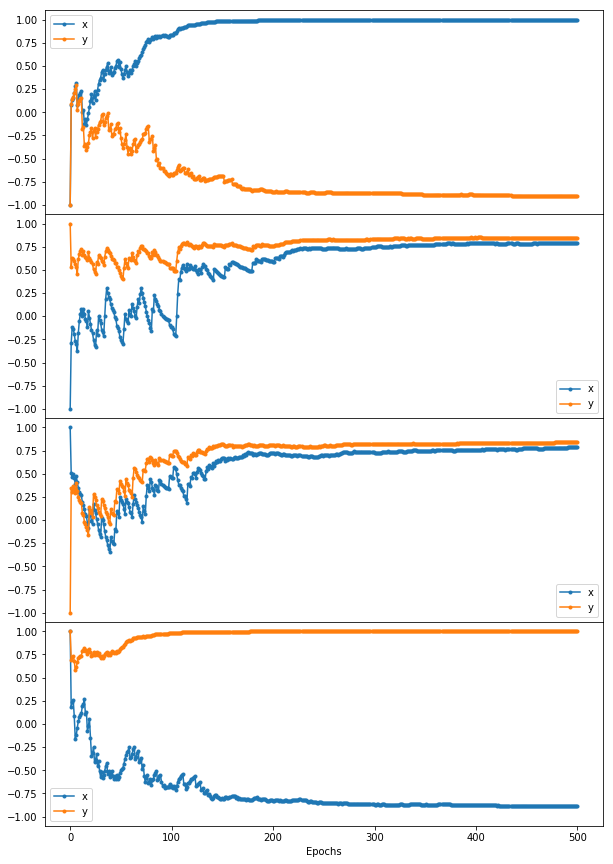

In [164]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 
                                       sharex=True,
                                       sharey=True,
                                       figsize=(10,15))
ax1.plot(l_minus_minus_x, marker='.', label= 'x')
ax1.plot(l_minus_minus_y, marker='.', label= 'y')
ax1.legend()
ax2.plot(l_minus_plus_x, marker='.', label= 'x')
ax2.plot(l_minus_plus_y, marker='.', label= 'y')
ax2.legend()
ax3.plot(l_plus_minus_x, marker='.', label= 'x')
ax3.plot(l_plus_minus_y, marker='.', label= 'y')
ax3.legend()
ax4.plot(l_plus_plus_x, marker='.', label= 'x')
ax4.plot(l_plus_plus_y, marker='.', label= 'y')
ax4.legend()
ax4.set_xlabel('Epochs')

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
#plt.xlim(-10, 1000)
#plt.legend()
plt.show()

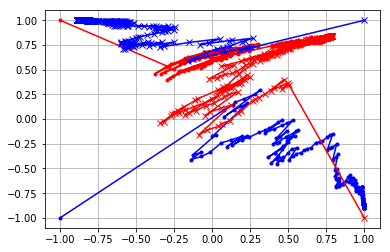

In [160]:
plt.plot(l_minus_minus_x, l_minus_minus_y, marker= '.', color= 'blue')
plt.plot(l_minus_plus_x, l_minus_plus_y, marker= '.', color= 'red')
plt.plot(l_plus_minus_x, l_plus_minus_y, marker= 'x', color= 'red')
plt.plot(l_plus_plus_x, l_plus_plus_y, marker= 'x', color= 'blue')
plt.grid()
#plt.show()